# Textbook Example 2

Following Steps from [https://lhbikos.github.io/ReC_Psychometrics/PAF.html]

## Install Packages

In [7]:
if(!require(psych)){install.packages('psych')}
if(!require(tidyverse)){install.packages('tidyverse')}
if(!require(MASS)){install.packages('MASS')}
if(!require(sjstats)){install.packages('sjstats')}
if(!require(apaTables)){install.packages('apaTables')}
if(!require(qualtRics)){install.packages('qualtRics')}

## Create Data

Generate data using model in textbook

In [5]:
LewisGRMS_generating_model <- "
        #measurement model
        Objectification =~ .69*Obj1 + .69*Obj2 + .60*Obj3 + .59*Obj4 + .55*Obj5 + .55*Obj6 + .54*Obj7 + .50*Obj8 + .41*Obj9 + .41*Obj10
        Marginalized =~ .93*Marg1 + .81*Marg2 +.69*Marg3 + .67*Marg4 + .61*Marg5 + .58*Marg6 +.54*Marg7
        
        Strong =~ .59*Str1 + .55*Str2 + .54*Str3 + .54*Str4 + .51*Str5
        Angry =~ .70*Ang1 + .69*Ang2 + .68*Ang3
        
        #Means
         Objectification ~ 1.85*1
         Marginalized ~ 2.67*1
         Strong ~ 1.61*1
         Angry ~ 2.29*1
         
        #Correlations
         Objectification ~~ .63*Marginalized
         Objectification ~~ .66*Strong
         Objectification ~~ .51*Angry
         
         Marginalized ~~ .59*Strong
         Marginalized ~~ .62*Angry

         Strong ~~ .61*Angry
 
        "

set.seed(240311)
dfGRMS <- lavaan::simulateData(model = LewisGRMS_generating_model, model.type = "sem",
    meanstructure = T, sample.nobs = 259, standardized = FALSE)

# used to retrieve column indices used in the rescaling script below
col_index <- as.data.frame(colnames(dfGRMS))

# The code below loops through each column of the dataframe and
# assigns the scaling accordingly Rows 1 thru 26 are the GRMS items

for (i in 1:ncol(dfGRMS)) {
    if (i >= 1 & i <= 25) {
        dfGRMS[, i] <- scales::rescale(dfGRMS[, i], c(0, 5))
    }
}

# rounding to integers so that the data resembles that which was
# collected
library(tidyverse)
dfGRMS <- dfGRMS %>%
    round(0)

# quick check
psych::describe(dfGRMS)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Obj1,1,259,2.401544,0.9926852,2,2.382775,1.4826,0,5,5,0.035388895,0.168559330,0.06168246
Obj2,2,259,2.339768,0.9963118,2,2.306220,1.4826,0,5,5,0.174887984,0.182903027,0.06190780
Obj3,3,259,2.397683,0.9483536,2,2.382775,1.4826,0,5,5,0.008495077,-0.043642811,0.05892782
Obj4,4,259,2.181467,0.8592205,2,2.172249,1.4826,0,5,5,0.193312804,0.103042978,0.05338936
Obj5,5,259,2.598456,1.0715478,3,2.612440,1.4826,0,5,5,-0.114136974,-0.404542207,0.06658274
Obj6,6,259,2.694981,1.0017494,3,2.727273,1.4826,0,5,5,-0.033562625,-0.540148833,0.06224568
Obj7,7,259,2.305019,0.9460310,2,2.267943,1.4826,0,5,5,0.156688738,-0.002025067,0.05878351
Obj8,8,259,2.444015,0.9920971,2,2.430622,1.4826,0,5,5,0.071450145,-0.088762580,0.06164592
Obj9,9,259,2.285714,0.9418297,2,2.258373,1.4826,0,5,5,0.017542842,-0.468791733,0.05852245


Save data file

To recover: `dfGRMS <- readRDS('dfGRMS.rds')`

In [6]:
saveRDS(dfGRMS, 'dfGRMS.rds')

## 9.5.1 Data prep

In [8]:
correlation_matrix <- cor(dfGRMS)
round(correlation_matrix, 2)

,Obj1,Obj2,Obj3,Obj4,Obj5,Obj6,Obj7,Obj8,Obj9,Obj10,⋯,Marg6,Marg7,Str1,Str2,Str3,Str4,Str5,Ang1,Ang2,Ang3
Obj1,1.00,0.29,0.29,0.40,0.32,0.31,0.31,0.24,0.25,0.19,⋯,0.26,0.13,0.13,0.17,0.18,0.16,0.09,0.05,0.02,0.07
Obj2,0.29,1.00,0.28,0.29,0.27,0.24,0.21,0.27,0.27,0.18,⋯,0.13,0.08,0.16,0.10,0.13,0.15,0.11,0.07,0.13,0.04
Obj3,0.29,0.28,1.00,0.32,0.18,0.25,0.24,0.18,0.15,0.27,⋯,0.17,0.12,0.16,0.10,0.15,0.18,0.16,0.13,0.08,0.09
Obj4,0.40,0.29,0.32,1.00,0.35,0.26,0.36,0.17,0.18,0.27,⋯,0.09,0.12,0.16,0.12,0.20,0.21,0.16,0.12,0.14,0.11
Obj5,0.32,0.27,0.18,0.35,1.00,0.30,0.16,0.20,0.16,0.15,⋯,0.27,0.13,0.20,0.17,0.21,0.10,0.14,0.14,0.13,0.04
Obj6,0.31,0.24,0.25,0.26,0.30,1.00,0.18,0.25,0.15,0.10,⋯,0.24,0.04,0.16,0.19,0.19,0.12,0.18,0.23,0.15,0.08
Obj7,0.31,0.21,0.24,0.36,0.16,0.18,1.00,0.15,0.29,0.23,⋯,0.09,0.09,0.10,0.15,0.14,0.20,0.17,0.08,0.11,0.14
Obj8,0.24,0.27,0.18,0.17,0.20,0.25,0.15,1.00,0.17,0.09,⋯,0.11,0.02,0.15,0.00,0.13,0.16,0.16,0.08,0.00,0.01
Obj9,0.25,0.27,0.15,0.18,0.16,0.15,0.29,0.17,1.00,0.15,⋯,0.21,0.13,0.11,0.11,0.15,0.18,0.08,0.08,0.22,0.11
Obj10,0.19,0.18,0.27,0.27,0.15,0.10,0.23,0.09,0.15,1.00,⋯,0.11,0.05,0.08,0.03,0.03,0.13,0.13,0.11,0.11,0.04


### 9.5.1.1 Diagnosis

In [10]:
psych::KMO(dfGRMS)

Kaiser-Meyer-Olkin factor adequacy
Call: psych::KMO(r = dfGRMS)
Overall MSA =  0.85
MSA for each item = 
 Obj1  Obj2  Obj3  Obj4  Obj5  Obj6  Obj7  Obj8  Obj9 Obj10 Marg1 Marg2 Marg3 
 0.85  0.90  0.88  0.86  0.91  0.89  0.86  0.82  0.84  0.85  0.89  0.88  0.87 
Marg4 Marg5 Marg6 Marg7  Str1  Str2  Str3  Str4  Str5  Ang1  Ang2  Ang3 
 0.86  0.83  0.83  0.82  0.87  0.79  0.88  0.87  0.81  0.74  0.83  0.77 

KMO > 0.7 is good ✅

In [11]:
psych::cortest.bartlett(correlation_matrix, n = nrow(dfGRMS))

$chisq
[1] 1181.604

$p.value
[1] 8.08864e-105

$df
[1] 300

p < 0.001 ✅

In [12]:
det(correlation_matrix)

[1] 0.008664022

det > 0.00001 ✅

## PAF 

In [17]:
paf_1 <- psych::fa(correlation_matrix, nfactors = 12, fm = "pa", max.iter = 100, rotate='none')
paf_1

maximum iteration exceeded



Factor Analysis using method =  pa
Call: psych::fa(r = correlation_matrix, nfactors = 12, rotate = "none", 
    max.iter = 100, fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
       PA1   PA2   PA3   PA4   PA5   PA6   PA7   PA8   PA9  PA10  PA11  PA12
Obj1  0.51 -0.33 -0.06  0.02 -0.17 -0.20 -0.02 -0.20 -0.08  0.02  0.09 -0.04
Obj2  0.44 -0.26 -0.07  0.02 -0.05  0.02  0.07  0.09 -0.13 -0.09  0.08  0.16
Obj3  0.44 -0.26  0.00  0.04  0.00  0.00 -0.06  0.14  0.12  0.18  0.26  0.09
Obj4  0.54 -0.34 -0.01  0.06  0.07  0.00 -0.28 -0.02 -0.13  0.13 -0.12 -0.04
Obj5  0.49 -0.11 -0.07 -0.03 -0.24  0.02 -0.04  0.02 -0.17  0.05 -0.09 -0.12
Obj6  0.46 -0.14  0.07  0.06 -0.26  0.10  0.05  0.01 -0.04 -0.04  0.02 -0.06
Obj7  0.46 -0.32  0.09  0.10  0.31 -0.25 -0.03 -0.03  0.23 -0.19 -0.10 -0.19
Obj8  0.36 -0.21 -0.14 -0.07 -0.09  0.24  0.12  0.01  0.05 -0.20  0.06  0.06
Obj9  0.40 -0.09 -0.01  0.14  0.13 -0.17  0.29 -0.04 -0.08 -0.18  0.04  0.11
Obj10 0.31 -0.20 -0.03

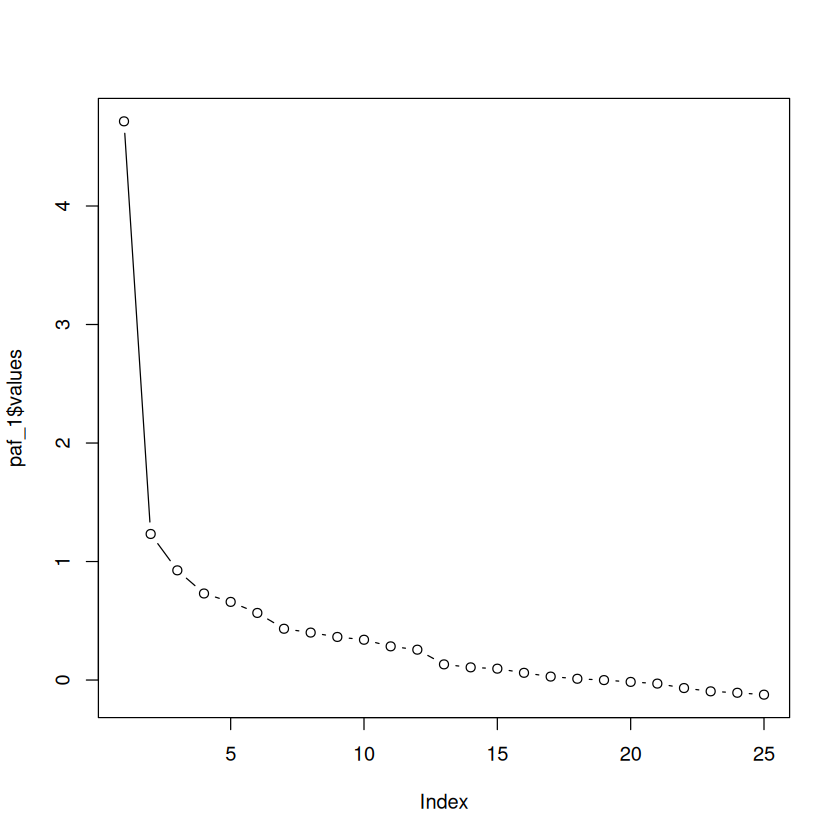

In [18]:
par(bg = "#FFFFFF")
plot(paf_1$values, type = "b")

In [40]:
paf_2factors <- psych::fa(correlation_matrix, nfactors = 4, fm = "pa", max.iter = 100, rotate='none')
paf_2factors

Factor Analysis using method =  pa
Call: psych::fa(r = correlation_matrix, nfactors = 4, rotate = "none", 
    max.iter = 100, fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
       PA1   PA2   PA3   PA4   h2   u2 com
Obj1  0.50  0.33 -0.10 -0.17 0.40 0.60 2.1
Obj2  0.44  0.26 -0.08 -0.03 0.27 0.73 1.7
Obj3  0.43  0.24  0.00  0.00 0.25 0.75 1.6
Obj4  0.53  0.31  0.02  0.02 0.38 0.62 1.6
Obj5  0.49  0.11 -0.11 -0.10 0.28 0.72 1.3
Obj6  0.46  0.16  0.04 -0.13 0.25 0.75 1.4
Obj7  0.43  0.24  0.09  0.03 0.25 0.75 1.7
Obj8  0.36  0.19 -0.15  0.08 0.19 0.81 2.0
Obj9  0.39  0.08  0.05 -0.08 0.17 0.83 1.2
Obj10 0.31  0.18  0.00 -0.06 0.13 0.87 1.7
Marg1 0.63 -0.18 -0.14 -0.04 0.46 0.54 1.3
Marg2 0.58 -0.17 -0.14  0.27 0.45 0.55 1.7
Marg3 0.52 -0.24  0.04 -0.02 0.33 0.67 1.4
Marg4 0.41 -0.20 -0.02 -0.18 0.24 0.76 1.9
Marg5 0.43 -0.24 -0.32  0.27 0.42 0.58 3.3
Marg6 0.49 -0.30 -0.24 -0.29 0.47 0.53 2.9
Marg7 0.40 -0.35 -0.02  0.08 0.29 0.71 2.1
Str1  0.34  0.02  0

In [41]:
mean(paf_2factors$communality)

[1] 0.2744776

In [42]:
round(psych::factor.residuals(correlation_matrix, paf_2factors$loadings), 3)

,Obj1,Obj2,Obj3,Obj4,Obj5,Obj6,Obj7,Obj8,Obj9,Obj10,⋯,Marg6,Marg7,Str1,Str2,Str3,Str4,Str5,Ang1,Ang2,Ang3
Obj1,0.599,-0.026,-0.002,0.030,0.006,0.012,0.032,-0.008,0.013,-0.039,⋯,0.032,0.056,-0.015,0.059,0.029,0.002,-0.053,-0.061,-0.077,0.036
Obj2,-0.026,0.734,0.027,-0.027,0.018,-0.006,-0.037,0.054,0.078,-0.003,⋯,-0.037,-0.002,0.012,-0.012,-0.021,-0.005,-0.030,-0.003,0.045,-0.003
Obj3,-0.002,0.027,0.755,0.014,-0.063,0.015,0.000,-0.024,-0.033,0.092,⋯,0.032,0.037,0.013,-0.023,-0.015,0.005,0.002,0.033,-0.011,0.012
Obj4,0.030,-0.027,0.014,0.618,0.059,-0.033,0.050,-0.077,-0.057,0.050,⋯,-0.073,0.020,-0.032,-0.041,-0.009,-0.005,-0.049,-0.001,0.023,0.005
Obj5,0.006,0.018,-0.063,0.059,0.721,0.044,-0.067,-0.005,-0.048,-0.032,⋯,0.002,-0.021,0.049,0.039,0.058,-0.046,0.013,0.017,-0.007,-0.020
Obj6,0.012,-0.006,0.015,-0.033,0.044,0.747,-0.051,0.072,-0.050,-0.081,⋯,0.034,-0.068,0.022,0.050,0.032,-0.029,0.040,0.069,0.010,-0.026
Obj7,0.032,-0.037,0.000,0.050,-0.067,-0.051,0.748,-0.037,0.103,0.057,⋯,-0.024,-0.001,-0.061,0.007,-0.046,0.008,-0.007,-0.042,0.004,0.017
Obj8,-0.008,0.054,-0.024,-0.077,-0.005,0.072,-0.037,0.806,0.033,-0.049,⋯,-0.021,-0.064,0.020,-0.086,0.015,0.017,0.041,0.063,-0.047,0.001
Obj9,0.013,0.078,-0.033,-0.057,-0.048,-0.050,0.103,0.033,0.832,0.006,⋯,0.033,0.009,-0.014,-0.017,0.012,0.047,-0.039,-0.068,0.089,0.002
Obj10,-0.039,-0.003,0.092,0.050,-0.032,-0.081,0.057,-0.049,0.006,0.867,⋯,-0.008,0.000,-0.019,-0.059,-0.082,0.019,0.024,0.025,0.040,-0.011


In [43]:
grmsPAF2_resids <- psych::factor.residuals(correlation_matrix, paf_2factors$loadings)  #first extract the resids
grmsPAF2_resids <- as.matrix(grmsPAF2_resids[upper.tri(grmsPAF2_resids)]) 
large.resid <- abs(grmsPAF2_resids) > 0.05
sum(large.resid)
round(sum(large.resid)/nrow(grmsPAF2_resids), 3)

[1] 54

[1] 0.18

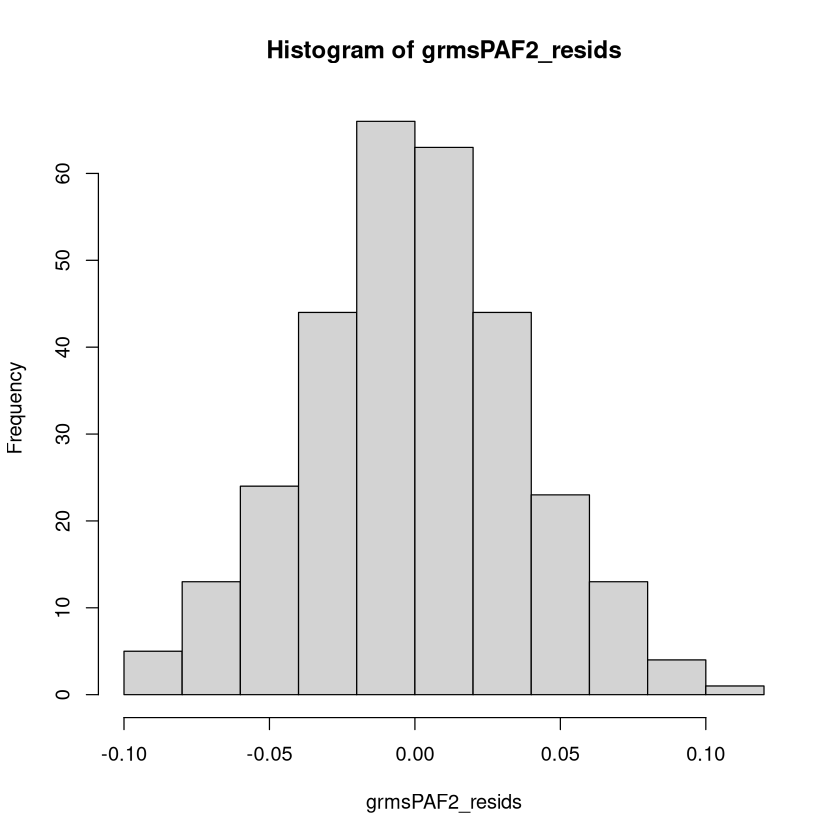

In [44]:
hist(grmsPAF2_resids)

### Rotation

Orthogonal - factors are independent

Oblique - factors are related

In [56]:
paf_2factors_rotated <- psych::fa(correlation_matrix, nfactors = 3, fm = "pa", max.iter = 100, rotate='oblimin')
paf_2factors_rotated

Factor Analysis using method =  pa
Call: psych::fa(r = correlation_matrix, nfactors = 3, rotate = "oblimin", 
    max.iter = 100, fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
        PA2   PA1   PA3   h2   u2 com
Obj1   0.60  0.03 -0.08 0.36 0.64 1.0
Obj2   0.51  0.04 -0.06 0.27 0.73 1.0
Obj3   0.50 -0.01  0.03 0.25 0.75 1.0
Obj4   0.62 -0.02  0.05 0.38 0.62 1.0
Obj5   0.38  0.23 -0.06 0.27 0.73 1.7
Obj6   0.42  0.07  0.07 0.23 0.77 1.1
Obj7   0.49 -0.06  0.13 0.26 0.74 1.2
Obj8   0.39  0.10 -0.12 0.19 0.81 1.3
Obj9   0.30  0.10  0.10 0.16 0.84 1.4
Obj10  0.36  0.00  0.01 0.13 0.87 1.0
Marg1  0.16  0.59  0.01 0.47 0.53 1.1
Marg2  0.15  0.49  0.04 0.36 0.64 1.2
Marg3  0.04  0.47  0.19 0.33 0.67 1.3
Marg4  0.02  0.41  0.09 0.21 0.79 1.1
Marg5  0.00  0.56 -0.12 0.29 0.71 1.1
Marg6 -0.02  0.63 -0.08 0.36 0.64 1.0
Marg7 -0.15  0.53  0.15 0.29 0.71 1.3
Str1   0.21  0.11  0.14 0.12 0.88 2.2
Str2   0.12  0.11  0.29 0.16 0.84 1.6
Str3   0.23  0.05  0.26 0.17 0

In [57]:
psych::print.psych(paf_2factors_rotated, cut = 0.3, sort = TRUE)

Factor Analysis using method =  pa
Call: psych::fa(r = correlation_matrix, nfactors = 3, rotate = "oblimin", 
    max.iter = 100, fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
      item   PA2   PA1   PA3   h2   u2 com
Obj4     4  0.62             0.38 0.62 1.0
Obj1     1  0.60             0.36 0.64 1.0
Obj2     2  0.51             0.27 0.73 1.0
Obj3     3  0.50             0.25 0.75 1.0
Obj7     7  0.49             0.26 0.74 1.2
Obj6     6  0.42             0.23 0.77 1.1
Obj8     8  0.39             0.19 0.81 1.3
Obj5     5  0.38             0.27 0.73 1.7
Obj10   10  0.36             0.13 0.87 1.0
Obj9     9  0.30             0.16 0.84 1.4
Str4    21                   0.14 0.86 1.8
Str5    22                   0.14 0.86 1.9
Str1    18                   0.12 0.88 2.2
Marg6   16        0.63       0.36 0.64 1.0
Marg1   11        0.59       0.47 0.53 1.1
Marg5   15        0.56       0.29 0.71 1.1
Marg7   17        0.53       0.29 0.71 1.3
Marg2   12      

In [58]:
paf_2factors_rotated$loadings %*% paf_2factors_rotated$Phi

,PA2,PA1,PA3
Obj1,0.5960377,0.3088616,0.059394445
Obj2,0.5137515,0.2749874,0.060524064
Obj3,0.4975288,0.2521097,0.134138263
Obj4,0.6164859,0.3067371,0.173652086
Obj5,0.4850795,0.4023188,0.099481035
Obj6,0.4708077,0.3078857,0.187202549
Obj7,0.4899801,0.2307771,0.218488325
Obj8,0.4121972,0.2558650,-0.007693106
Obj9,0.3738102,0.2816498,0.200292324
Obj10,0.3605181,0.1814866,0.089070699


In [59]:
factor.structure <- function(fa, cut = 0.2, decimals = 2) {
    structure.matrix <- psych::fa.sort(fa$loadings %*% fa$Phi)
    structure.matrix <- data.frame(ifelse(abs(structure.matrix) < cut,
        "", round(structure.matrix, decimals)))
    return(structure.matrix)
}

factor.structure(paf_2factors_rotated, cut = 0.3)

,PA2,PA1,PA3
,<chr>,<chr>,<chr>
Obj4,0.62,0.31,
Obj1,0.6,0.31,
Obj2,0.51,,
Obj3,0.5,,
Obj7,0.49,,
Obj5,0.49,0.4,
Obj6,0.47,0.31,
Obj8,0.41,,
Obj9,0.37,,


In [62]:
paf_2factors_scores <- psych::fa(correlation_matrix, nfactors = 3, fm = "pa", rotate = "oblimin", scores = TRUE)
pafOBL_table <- round(paf_2factors_scores$loadings, 3)
pafOBL_table


Loadings:
      PA2    PA1    PA3   
Obj1   0.598              
Obj2   0.509              
Obj3   0.495              
Obj4   0.617              
Obj5   0.383  0.226       
Obj6   0.418              
Obj7   0.492         0.130
Obj8   0.390        -0.123
Obj9   0.303         0.104
Obj10  0.360              
Marg1  0.159  0.585       
Marg2  0.154  0.494       
Marg3         0.471  0.186
Marg4         0.406       
Marg5         0.560 -0.121
Marg6         0.633       
Marg7 -0.147  0.533  0.149
Str1   0.213  0.106  0.137
Str2   0.123  0.105  0.294
Str3   0.233         0.259
Str4   0.282         0.188
Str5   0.277         0.209
Ang1          0.123  0.365
Ang2          0.303  0.294
Ang3                 0.543

                 PA2   PA1   PA3
SS loadings    2.527 2.185 0.918
Proportion Var 0.101 0.087 0.037
Cumulative Var 0.101 0.188 0.225

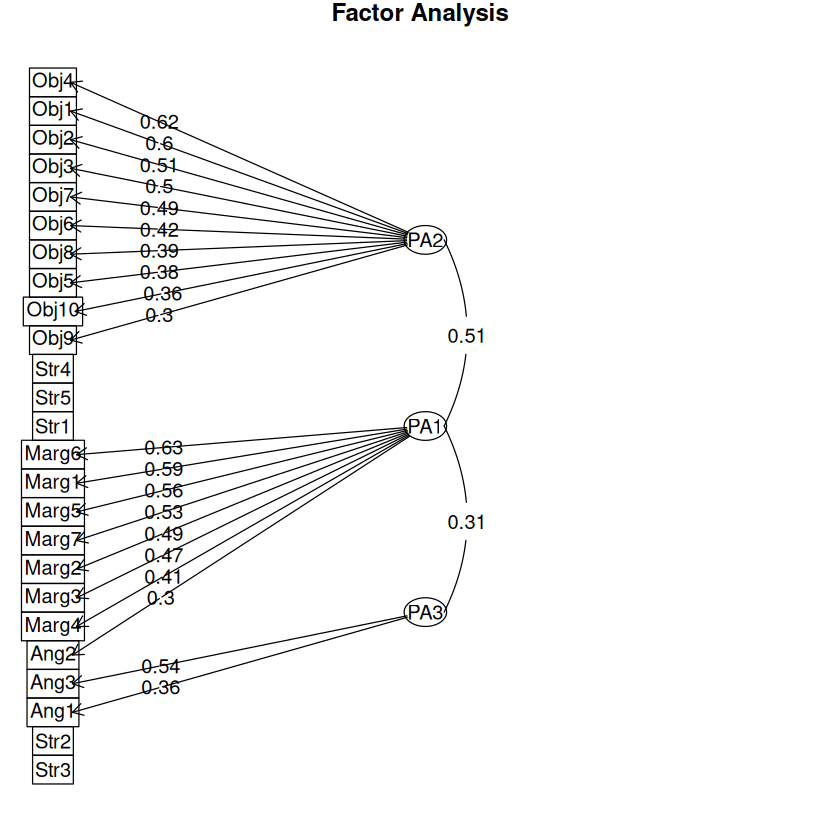

In [64]:
par(bg = "#FFFFFF")
psych::fa.diagram(paf_2factors_scores, digits = 2)